In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## The Beta-Binomial Distribution ##

As in the previous section, let $X$ have the beta $(r, s)$ prior, and given $X = p$ let the $S_n$ be the number of heads in the first $n$ tosses of a $p$-coin.

All the calculations we carried out in the previous section were under the condition that $S_n = k$, but we never needed to find the probability of this event. It was part of the constant that made the posterior density of $X$ integrate to 1. 

We can now find $P(S_n = k)$ by writing the posterior density in two ways:

- By recalling that it is the beta $(r+k, s+n-k)$ density:

$$
f_{X \vert S_n=k} (p) ~ = ~ C(r+k, s+n-k)p^{r+k-1}(1-p)^{s+n-k-1}, ~~~~ 0 < p < 1
$$

- By using Bayes' Rule:

$$
f_{X \vert S_n=k} (p) ~ = ~ \frac{C(r, s) p^{r-1}(1-p)^{s-1} \cdot \binom{n}{k} p^k (1-p)^{n-k}}{P(S_n = k)}, ~~~~ 0 < p < 1
$$

Now equate constants:

$$
\frac{C(r, s) \binom{n}{k}}{P(S_n = k)} ~ = ~ C(r+k, s+n-k)
$$

### Beta-Binomial Probabilities ###

So for $k$ in the range 0 through $n$,

$$
P(S_n = k) ~ = ~  \binom{n}{k} \frac{C(r, s)}{C(r+k, s+n-k)}
$$

where $C(r,s)$ is the constant in the beta $(r, s)$ density, given by

$$
C(r, s) ~ = ~ \frac{\Gamma(r+s)}{\Gamma(r)\Gamma(s)}
$$

That's not as awful as it looks. A better way to think of the formula is

$$
P(S_n = k) ~ = ~ \binom{n}{k} \frac{\text{constant in the prior beta}}{\text{constant in the posterior beta given }k \text{ heads in } n \text{ tosses}}
$$

This discrete distribution is called the *beta-binomial* distribution with parameters $r$, $s$, and $n$. It is the distribution of the number of heads in $n$ tosses of a coin that lands heads with a probability picked according to the beta $(r, s)$ distribution.

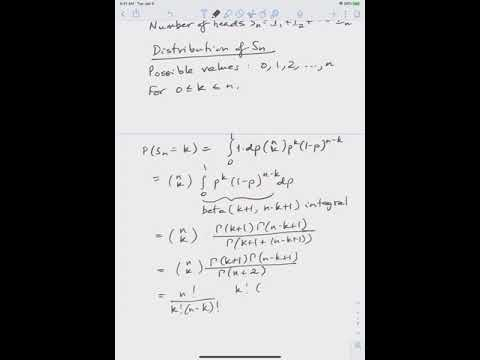

In [2]:
# VIDEO: Number of Heads (Uniform Prior)

from IPython.display import YouTubeVideo

YouTubeVideo('_cc2xuBG6tY')

One $(r, s)$ pair is particularly interesting: $r = s = 1$. That's the case when $X$ has the uniform prior. The distribution of $S_n$ reduces to

$$
P(S_n = k ) ~ = ~ \frac{n!}{k!(n-k)!} \cdot \frac{1!}{0!0!} \cdot \frac{k!(n-k)!}{(n+1)!} ~ = ~ \frac{1}{n+1}
$$

There's no $k$ in the answer! The conclusion is that if you choose $p$ uniformly between 0 and 1 and toss a $p$-coin $n$ times, *the distribution of the number of heads is uniform* on $\{ 0, 1, 2, \ldots, n\}$.

If you choose $p$ uniformly between 0 and 1, then for the conditional distribution of $S_n$ given that $p$ was the selected value is binomial $(n, p)$. But the unconditional distribution of $S_n$ is uniform.

### Checking by Integration ###
If you prefer, you can find the distribution of $S_n$ directly, by conditioning on $X$.

$$
\begin{align*}
P(S_n = k) ~ &= \int_0^1 P(S_n = k \mid X = p)f_X(p)dp \\ \\
&= ~ \int_0^1 \binom{n}{k} p^k(1-p)^{n-k}C(r, s)p^{r-1}(1-p)^{s-1}dp \\ \\
&= ~ \binom{n}{k} C(r, s) \int_0^1 p^{r+k-1}(1-p)^{s+n-k-1} dp \\ \\
&= ~ \binom{n}{k} C(r, s) \frac{1}{C(r+k, s+n-k)}
\end{align*}
$$

### Expectation ###
Given $X = p$, the conditional distribution of $S_n$ is binomial $(n, p)$. Therefore 

$$
E(S_n \mid X = p) ~ = ~ np
$$

or, equivalently,

$$
E(S_n \mid X) ~ = ~ nX
$$

By iteration,

$$
E(S_n) ~ = ~ E(nX) ~ = ~ nE(X) ~ = ~ n\frac{r}{r+s}
$$

The expected proportion of heads in $n$ tosses is

$$
E\big{(} \frac{S_n}{n} \big{)} ~ = ~ \frac{r}{r+s}
$$

which is the expectation of the prior distribution of $X$. 

In the next section we will examine the long run behavior of this random proportion.

### Endnote ###
The unconditional probability $P(S_n = k)$ appeared in the denominator of our calculation of the posterior density of $X$ given $S_n$. Because of the simplifications that result from using conjugate priors, we were able to calculate the denominator in a couple of different ways. But often the calculation can be intractable, especially in high dimensional settings. Methods of dealing with this problem are covered in more advanced courses.